In [3]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mappings = ["./datasets/all_samples_filtered.csv",
            "./datasets/sample_merged_mapping.csv"]
dfs = []
for file in mappings:
    print(file)
    ori = pd.read_csv(file)
    if "merged" in file:
        ori["duration"] = (ori["end"] - ori["start"])/1000
    else:
        ori["duration"] = ori["end"]/1000
    print(sum(ori["duration"])/3600)
    ori["weights"] = ori["duration"]/ sum(ori["duration"])
    sum_ori_above = sum(ori.loc[ori["duration"] > 30]["duration"])
    print("above 30s: ", sum_ori_above/3600, sum_ori_above/sum(ori["duration"]))
    ori["index_uri"] = file.split("/")[-1]
    ori["weights_ratioed"] = (ori["duration"]/sum(ori["duration"])) * (sum(ori["duration"])/1000)
    ori = ori.loc[ori["duration"] < 30]
    dfs += [ori]

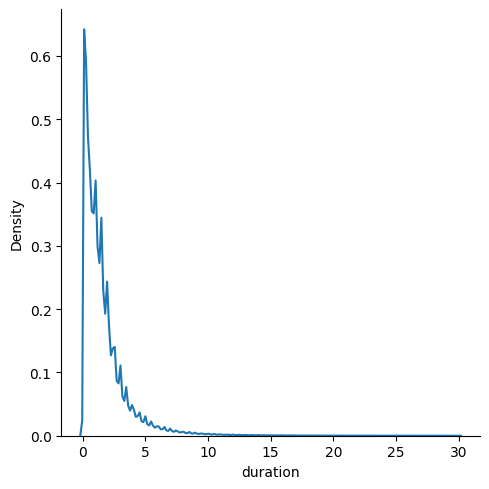

In [ ]:
sns.displot(dfs[0]["duration"], kind="kde")

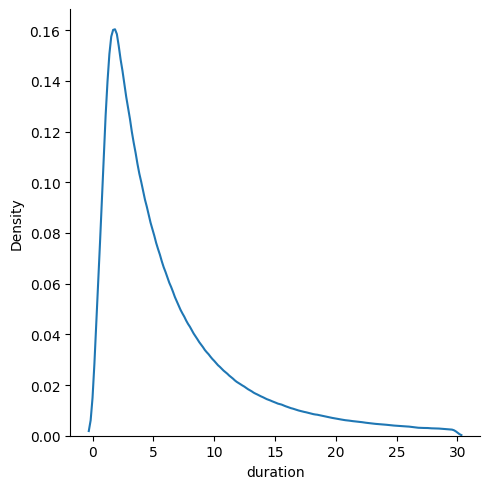

In [ ]:
sns.displot(data=ori, x="duration", weights="weights", kind="kde")

/lustre/fswork/projects/rech/kqg/commun/samples/samples_max_1on_10off.csv
16400.329172222224
/lustre/fswork/projects/rech/kqg/commun/samples/samples_padded_2on_2off.csv
13292.009883611112
/lustre/fswork/projects/rech/kqg/commun/samples/samples_max_1on_4off.csv
15158.16400638889
/lustre/fswork/projects/rech/kqg/commun/samples/samples_max_2on_2off.csv
13291.8337725
/lustre/fswork/projects/rech/kqg/commun/samples/samples_max_5on_2off.csv
11774.051911944445
/lustre/fswork/projects/rech/kqg/commun/samples/samples_max_1on_2off.csv
13747.838660555557


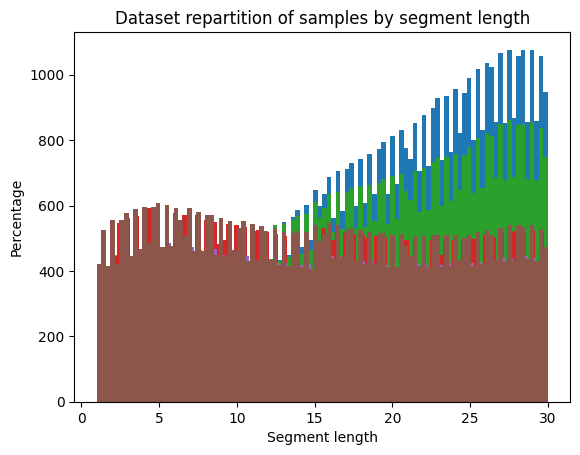

In [ ]:
files = glob("./samples/*.csv")
for f in files:
    print(f)
    dfs += [pd.read_csv(f, dtype={"uri":str,"start":float,"duration":float})]
    dfs[-1]["index_uri"] = f.split("/")[-1].split("max_")[-1]
    dfs[-1]["weights"] = dfs[-1]["duration"] / sum(dfs[-1]["duration"])
    duration = dfs[-1]["duration"]
    dfs[-1]["weights_ratioed"] = (duration/sum(duration)) * (sum(duration)/1000)
    counts, bins = np.histogram(duration, bins = 100, weights = (duration/sum(duration)) * (sum(duration)/1000))
    plt.hist(bins[:-1], bins, weights=counts)
    plt.xlabel("Segment length")
    plt.ylabel('Percentage')
    plt.title("Dataset repartition of samples by segment length")
    plt.plot()
    print(sum(duration)/3600)

In [6]:
bigdf = pd.concat(dfs)

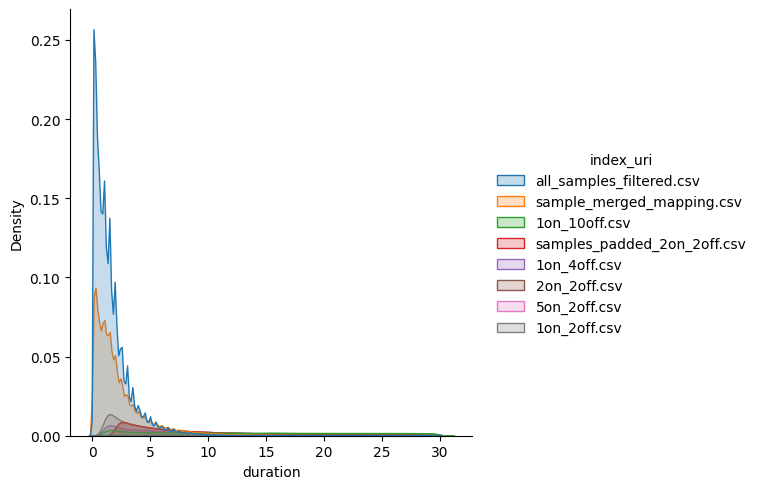

In [ ]:
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", fill=True)

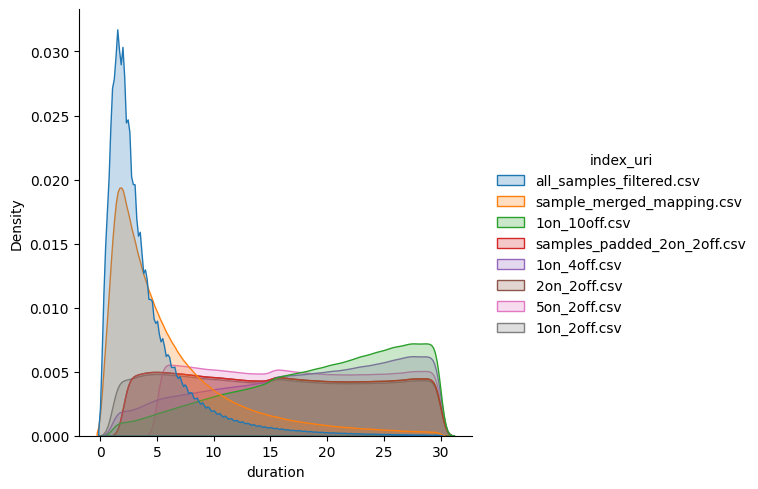

In [ ]:
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", weights="weights", fill=True)

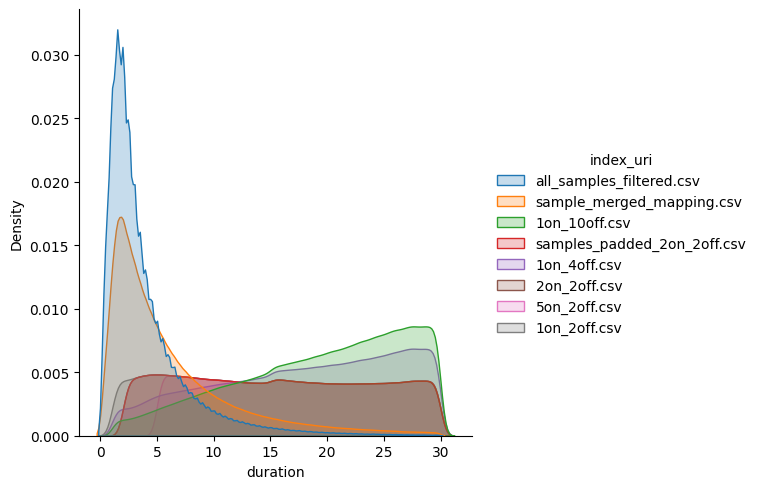

In [ ]:
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", weights="weights_ratioed", fill=True)

In [7]:
bigdf = bigdf.loc[bigdf["index_uri"] != "all_samples_filtered.csv"]
bigdf = bigdf.loc[bigdf["index_uri"] != "sample_merged_mapping.csv"]
bigdf = bigdf.loc[bigdf["index_uri"] != "1on_10off.csv"]

Text(0.5, 0.98, 'Distribution of time by sample length multiplied by total time')

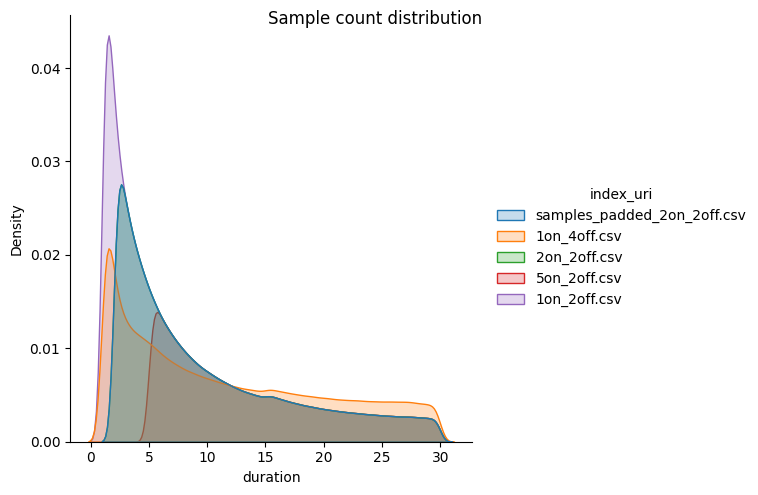

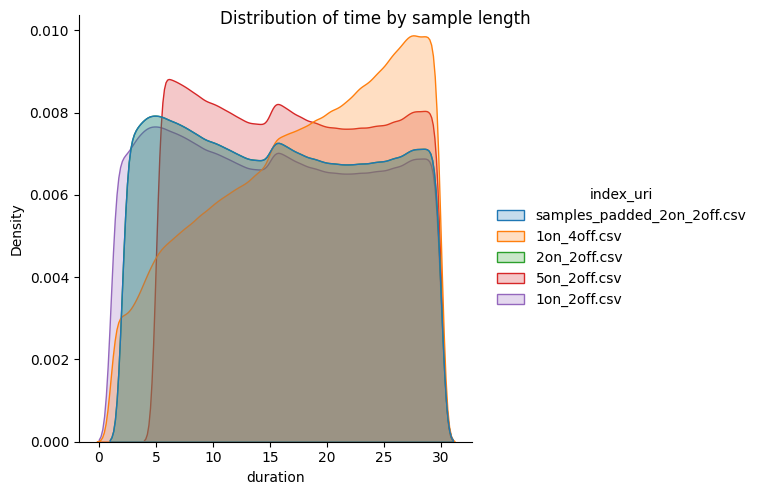

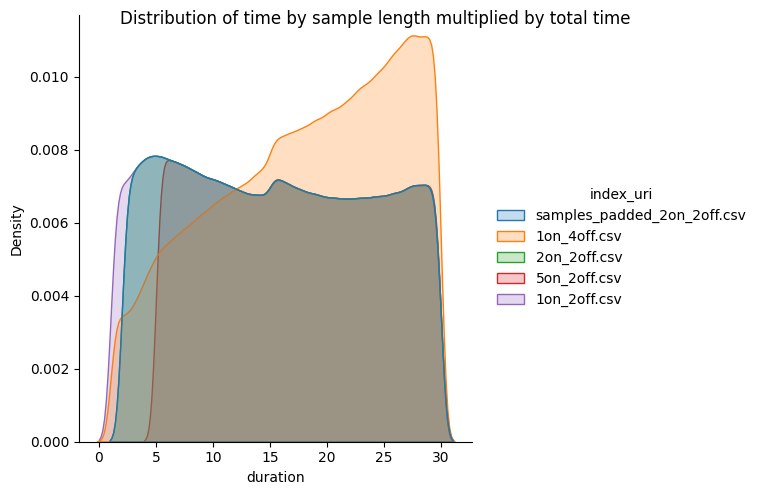

In [8]:
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", fill=True).fig.suptitle("Sample count distribution")
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", weights="weights", fill=True).fig.suptitle("Distribution of time by sample length")
sns.displot(data=bigdf, hue="index_uri", x="duration", kind="kde", weights="weights_ratioed", fill=True).fig.suptitle("Distribution of time by sample length multiplied by total time")